# TP_MPL

## Travail sur le jeu de données MNIST


### code du chargement des données mnist avec tensorfflow

In [1]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers


2022-10-20 16:42:59.410741: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-10-20 16:42:59.410777: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

### Redimentionnement et Standardisation

In [3]:
# redimentionnement
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)

#Standardisation
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255


print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")


x_train shape: (60000, 784)
60000 train samples
10000 test samples


### Un exemple en entrée est une image de taille fixe 28 * 28, chaque pixel étant blanc (0) ou noir (1). Le chiffre est centrée dans l’image

temps ecoule = 0.0008575916290283203


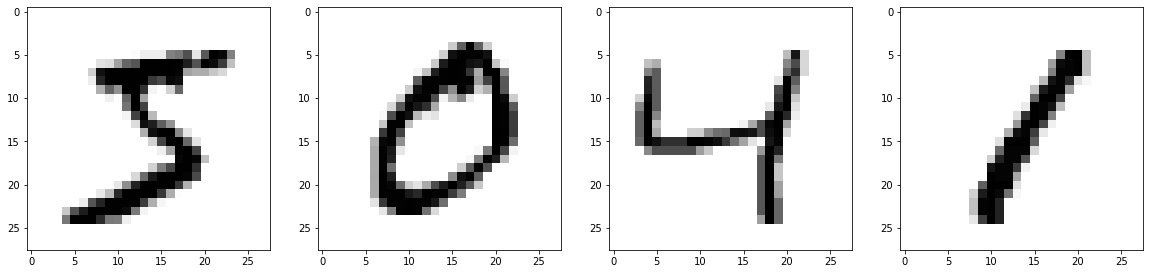

In [4]:
import time
import matplotlib.pyplot as plt
x_train__ = x_train.reshape(x_train.shape[0],28,28)


fig, axis = plt.subplots(1, 4, figsize=(20, 10))
for i, ax in enumerate(axis.flat):
    start_time = time.time()
    ax.imshow(x_train__[i], cmap='binary')
    digit = y_train[i].argmax()
    #ax.set(title = f"Real Number is {digit}");
end_time = time.time()
print('temps ecoule = '+str(end_time - start_time))

### En faisant varier les différents hyper-paramètres du modèle, avec ou sans pre-processing, et en utilisant une GridSearch, parvenez-vous à battre les quelques références ci-après, indiquons le temps d’apprentissage du modèle et tous ses hyper-paramètres et paramètres

In [6]:
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier
#import time 

#start = time.time()
param_grid={
    'hidden_layer_sizes': [10, 20, 30, 40],
    'activation': ['logistic', 'relu'],
    'solver': ['lbfgs', 'sgd', 'adam'],
    'learning_rate': ['constant','adaptative'],
    'alpha': [0.0001, 0.001, 0.01, 0.1]
}

mlp_clf = GridSearchCV(MLPClassifier(), param_grid, cv=3, n_jobs=4, verbose=1)

mlp_clf.fit(x_train, y_train)
#end = time.time()
#print(f"Execution time for knn paramSearch was: {end-start}")
#print("Meilleur score : " + str(mlp_clf.best_.score_(X_test, y_test)))
print("Meilleure configuration : ",(mlp_clf.best_params_))

Fitting 3 folds for each of 192 candidates, totalling 576 fits


C:\Users\SACKO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
288 fits failed out of a total of 576.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
288 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\SACKO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\SACKO\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py", line 752, in fit
    return self._fit(X, y, incremental=False)
  File "C:\Users\SACKO\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py", line 384, in _fit
    self._validate_hyp

Meilleure configuration :  {'activation': 'relu', 'alpha': 0.001, 'hidden_layer_sizes': 40, 'learning_rate': 'constant', 'solver': 'adam'}


C:\Users\SACKO\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [4]:
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier
import time 
start_time = time.time()
#activation': 'relu', 'alpha': 0.001, 'hidden_layer_sizes': 40, 'learning_rate': 'constant', 'solver': 'adam'}
mlp=MLPClassifier(solver='adam', max_iter=100, hidden_layer_sizes=(40),alpha=0.001,
                  learning_rate ='constant',activation='relu')

mlp.fit(x_train, y_train)

print("le temps d'apprentissage est %s seconds " % (time.time() - start_time))
print("__________________________________________")
print("le score sur l'ensemble de test est :",mlp.score(x_test,y_test))


le temps d'apprentissage est 325.818466424942 seconds 
__________________________________________
le score sur l'ensemble de test est : 0.971


/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


In [7]:
from sklearn.linear_model import Perceptron
clf=Perceptron()
clf.fit(x_train, y_train)

print("Score de l'ensemble de test:",clf.score(x_test,y_test))

Score de l'ensemble de test: 0.8824
